# 设置
%matplotlib notebook 用于交互式绘图，但容易出问题
%matplotlib 弹出式窗口，需要plt.show()
%matplotlib inline 适合导出md格式，需要plt.show()
%matplotlib auto 或 %matplotlib 显示动态图片(以弹出窗口的方式)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体，解决中文不显示的问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 基本用法

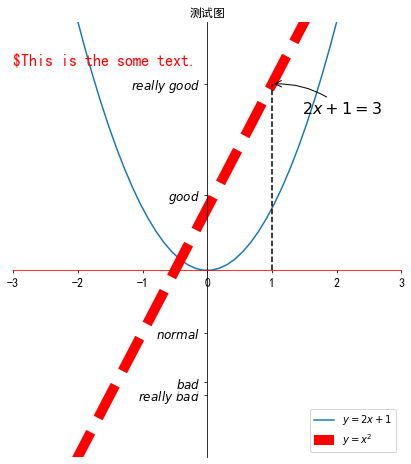

In [103]:
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2

size = 8  # 单张图片大小
fig = plt.figure(figsize=(size*4, size*1))  # 图像窗口
plt.subplot(1,4,1)
plt.title("测试图")
plt.plot(x, y2, label=r"$y=2x+1$")
plt.plot(x, y1, color='red', linewidth=10, linestyle='--', label=r"$y=x^2$")  # color linestyle 等价'r--' 可以指定'#CECECE'
plt.legend(loc="best")  # 图例的位置，显示label
plt.xlim((-3, 3))  # 设置x坐标轴范围
plt.ylim((-3, 4))
plt.yticks([-2, -1.8, -1, 1.22, 3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])  # 设置刻度和名称

ax1 = plt.gca()  # 获取坐标系
ax1.spines['right'].set_color('none')  # 隐藏右边框和上边框
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('red')  # 设置下边框为红色
# ax.xaxis.set_ticks_position('bottom')  # 设置x坐标刻度数字或名称的位置(默认bottom下边框)
ax1.spines['bottom'].set_position(('data', 0))  # 移动坐标轴，y=0的位置 (outward，axes，data)
ax1.spines['left'].set_position(('data', 0))

# 注释
x0 = 1
y0 = 2*x0 + 1
plt.scatter([x0, ], [y0, ], s=50, color='red')
plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=1.5)
plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords='data', xytext=(+30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))
plt.text(-3, 3.3, r'$This is the some text.', fontdict={'size': 16, 'color': 'r'})

# 对被遮挡的图像调节相关透明度
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.7, zorder=2))

plt.show()

# fig, axes = plt.subplots(2, 2)  # 与上面等价4个图，但可以对axes数组进行索引 如axes[0,0]

## 多图合并显示

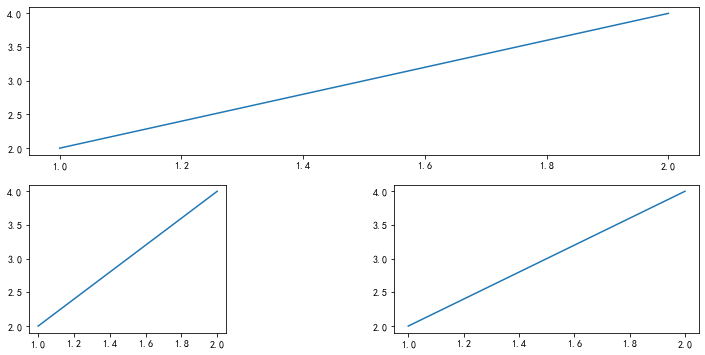

In [109]:
size = 6  # 单张图片大小
fig = plt.figure(figsize=(size*2, size*1))  # 图像窗口

x = [1,2]
y = [2,4]

plt.subplot(2,1,1)
plt.plot(x, y)
plt.subplot(2,3,4)
plt.plot(x, y)
plt.subplot(2,2,4)
plt.plot(x, y)

plt.show()

## 分格显示

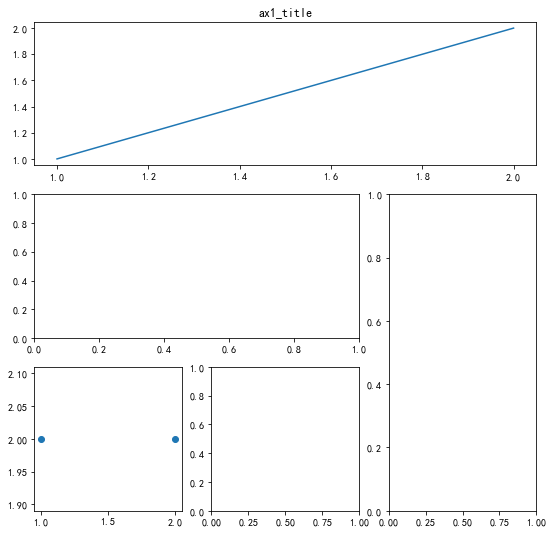

In [113]:
size = 3  # 单张图片大小
plt.figure(figsize=(size*3, size*3))  # 图像窗口
# (3,3)表示将整个图像窗口分成3行3列, (0,0)表示从第0行第0列开始作图
# colspan=3表示列的跨度为3, rowspan=1表示行的跨度为1. colspan和rowspan缺省, 默认跨度为1
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1.plot([1, 2], [1, 2])    # 画小图
ax1.set_title('ax1_title')  # 设置小图的标题

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.scatter([1, 2], [2, 2])

ax5 = plt.subplot2grid((3, 3), (2, 1))

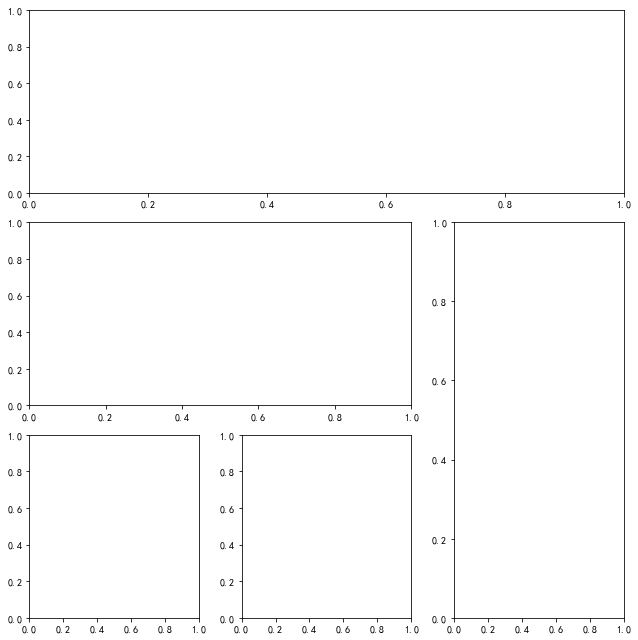

In [116]:
import matplotlib.gridspec as gridspec
size = 3  # 单张图片大小
plt.figure(figsize=(size*3, size*3))  # 图像窗口
gs = gridspec.GridSpec(3, 3)
ax6 = plt.subplot(gs[0, :])  # gs[0, :]表示这个图占第0行和所有列
ax7 = plt.subplot(gs[1, :2])
ax8 = plt.subplot(gs[1:, 2])
ax9 = plt.subplot(gs[-1, 0])
ax10 = plt.subplot(gs[-1, -2])

## 图中图

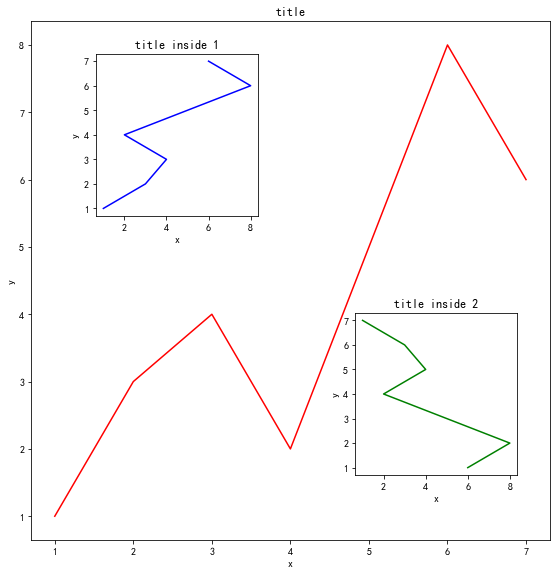

In [123]:
size = 3  # 单张图片大小
fig = plt.figure(figsize=(size*3, size*3))  # 图像窗口
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(y[::-1], x, 'g') # 注意对y进行了逆序处理
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show()

# 图像种类
## 散点图 scatter

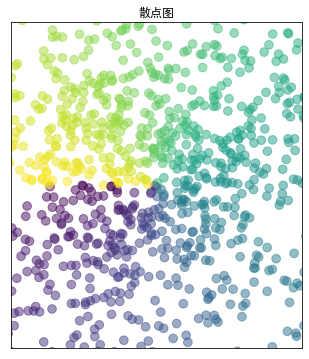

In [64]:
size = 6  # 单张图片大小
fig = plt.figure(figsize=(size*4, size*1))  # 图像窗口
fig.add_subplot(1, 4, 1)

plt.title("散点图")
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

plt.scatter(X, Y, s=75, c=T, alpha=.5, label="散点图")  # 散点图 大小=75 颜色=T 透明度=0.5

plt.xlim(-1.5, 1.5)
plt.xticks(())  # 隐藏x轴信息
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

## 条形图 bar

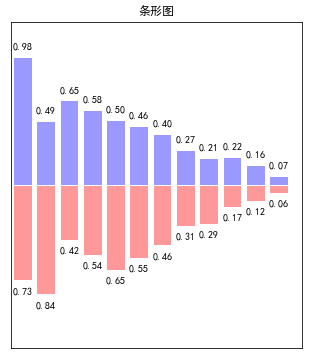

In [73]:
size = 6  # 单张图片大小
fig = plt.figure(figsize=(size*4, size*1))  # 图像窗口
fig.add_subplot(1, 4, 1)

plt.title("条形图")
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')  # 主体颜色，边框颜色
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

for x, y in zip(X, Y1):
    plt.text(x + 0.01, y + 0.05, '%.2f' % y, ha='center', va='bottom')  # ha垂直排列 横向居中对齐，va水平排列
for x, y in zip(X, Y2):
    plt.text(x + 0.01, -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.show()

## 等高线图 Contours

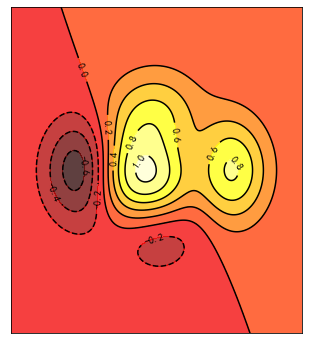

In [77]:
size = 6  # 单张图片大小
plt.figure(figsize=(size*4, size*1))  # 图像窗口
plt.subplot(1, 4, 1)

def f(x,y):
    """高度函数"""
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)  # 组成栅格

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)  # 颜色填充
C = plt.contour(X, Y, f(X, Y), 8, colors='black')  # 等高线绘制 等高线密集程度为8

plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

plt.show()

## 图片 Image

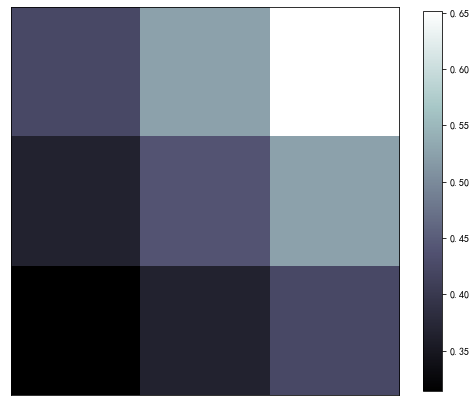

In [83]:
size = 10  # 单张图片大小
plt.figure(figsize=(size*4, size*1))  # 图像窗口
plt.subplot(1, 4, 1)

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')

plt.colorbar(shrink=.70)  # shrink参数，使colorbar的长度变短为原来的70%：

plt.xticks(())
plt.yticks(())
plt.show()

plt.show()

## 3D数据

E:\Anaconda3\envs\pytorch-gpu\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


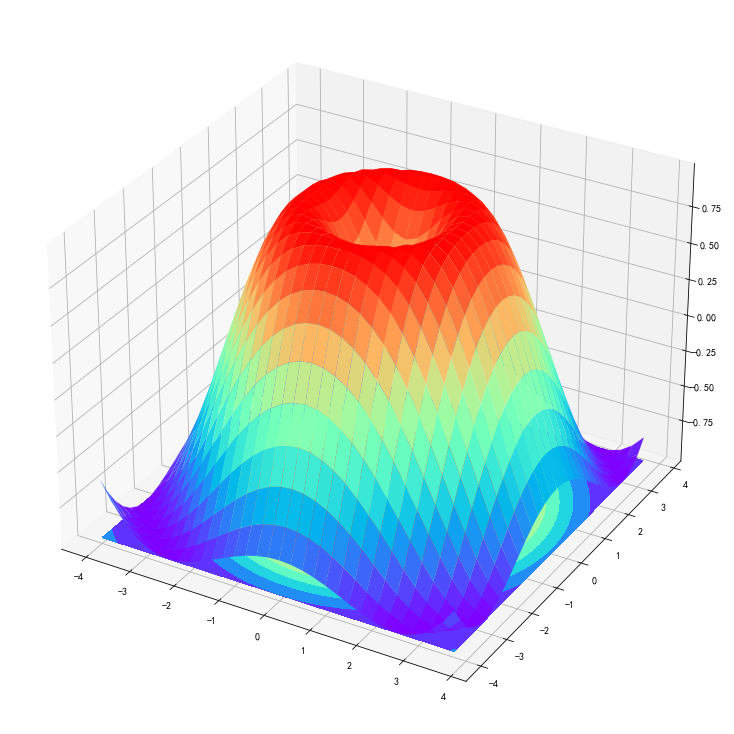

In [99]:
from mpl_toolkits.mplot3d import Axes3D  # 3D坐标轴

size = 10  # 单张图片大小
fig = plt.figure(figsize=(size*4, size*1))  # 图像窗口
ax = Axes3D(fig)  # 在窗口上添加3D坐标轴

X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)  # height value

# rstride 和 cstride 分别代表 row 和 column 的跨度； colormap rainbow 填充颜色
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

# 添加 XY 平面的等高线：
ax.contourf(X, Y, Z, zdir='z', offset=-1, cmap=plt.get_cmap('rainbow'))

plt.show()